# Supervised Learning Model Evaluation 

In [59]:
import pandas as pd

In [60]:
# Define our features and our target

from sklearn.datasets import load_boston

data = load_boston()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.DataFrame(data["target"], columns=['MEDV'])

data = pd.concat([X, y], axis=1)

## 1. Split this data set into training (80%) and testing (20%) sets.

The `MEDV` field represents the median value of owner-occupied homes (in $1000's) and is the target variable that we will want to predict.

In [61]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## 2. Train a `LinearRegression` model on this data set and generate predictions on both the training and the testing set.

In [10]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [11]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
predictions_train = model.predict(X_train)

In [51]:
# we use our model trained to predict the target
y_pred = model.predict(X_test)

## 3. Calculate and print R-squared for both the training and the testing set.

In [15]:
from sklearn.metrics import r2_score #coefficient of determination

print(f'train error: {r2_score(y_train, predictions_train)}')
print(f'test error: {r2_score(y_test, y_pred)}')

train error: 0.725045206065277
test error: 0.7834662272828978


Pay attention to the fact that changing the ground truth and predictions position also changes the result (the denominator is computed as a function of the ground truth mean)

## 4. Calculate and print mean squared error for both the training and the testing set.

In [17]:
from sklearn.metrics import mean_squared_error

print(f'train error: {mean_squared_error(y_train, predictions_train)}')
print(f'test error: {mean_squared_error(y_test, y_pred)}')

train error: 22.500244222401857
test error: 20.479780249247213


Differently from the previous case, changing the positions does not affect since the MSE only measures distances between points

## 5. Calculate and print mean absolute error for both the training and the testing set.

In [20]:
from sklearn.metrics import mean_absolute_error

print(f'test error: {mean_absolute_error(y_test, y_pred)}')

test error: 3.3172433994795236


## Classification Model Evaluation - Logistic Regression

In [52]:
from sklearn.datasets import load_iris

data = load_iris()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.DataFrame(data["target"], columns=["class"])

data = pd.concat([X, y], axis=1)

In [22]:
data['class'].value_counts()

2    50
1    50
0    50
Name: class, dtype: int64

## 6. Split this data set into training (80%) and testing (20%) sets.

The `class` field represents the type of flower and is the target variable that we will want to predict.

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 7. Train a `LogisticRegression` model on this data set and generate predictions on both the training and the testing set.

In [24]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='lbfgs', multi_class='auto') # Create the model, set parameters.
model.fit(X_train, y_train.values.ravel()) #Train the model

predictions_train = model.predict(X_train) 
predictions_test = model.predict(X_test)

/miniconda3/envs/ironhack/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


## 8. Calculate and print the accuracy score for both the training and the testing set.

In [53]:
# % of success, not balanced

from sklearn.metrics import accuracy_score

print(f'train error: {accuracy_score(y_train, predictions_train)}')
print(f'test error: {accuracy_score(y_test, predictions_test)}')

train error: 0.975
test error: 1.0


## 9. Calculate and print the balanced accuracy score for both the training and the testing set.

In [26]:
# % of success, not balanced

from sklearn.metrics import balanced_accuracy_score

print(f'train error: {balanced_accuracy_score(y_train, predictions_train)}')
print(f'test error: {balanced_accuracy_score(y_test, predictions_test)}')

train error: 0.975609756097561
test error: 1.0


## 10. Calculate and print the precision score for both the training and the testing set.

In [54]:
# % ratio tp / (tp + fp) 
# classifier not to label as positive a sample that is negative
from sklearn.metrics import precision_score

print(f'train error: {precision_score(y_train, predictions_train, average=None)}')
print(f'test error: {precision_score(y_test, predictions_test, average=None)}')

train error: [1.   1.   0.93]
test error: [1. 1. 1.]


Explanation of different means:

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html

In [28]:
y_true = [0, 0, 0, 0, 1, 2]
y_pred = [0, 0, 0, 0, 0, 2]

print(f'no average: {precision_score(y_true, y_pred, average=None)}')
print(f'micro average: {precision_score(y_true, y_pred, average="micro")}')
print(f'macro average: {precision_score(y_true, y_pred, average="macro")}')
print(f'weighted average: {precision_score(y_true, y_pred, average="weighted")}')

no average: [0.8 0.  1. ]
micro average: 0.8333333333333334
macro average: 0.6
weighted average: 0.7000000000000001


/miniconda3/envs/ironhack/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## 11. Calculate and print the recall score for both the training and the testing set.

In [29]:
# classifier to find all the positive samples

from sklearn.metrics import recall_score

print(f'train error: {recall_score(y_train, predictions_train, average="micro")}')
print(f'test error: {recall_score(y_test, predictions_test, average="micro")}')

train error: 0.975
test error: 1.0


## 12. Calculate and print the F1 score for both the training and the testing set.

In [30]:
# weighted average of the precision and recall,

from sklearn.metrics import f1_score

print(f'train error: {f1_score(y_train, predictions_train, average="macro")}')
print(f'test error: {f1_score(y_test, predictions_test, average="macro")}')

train error: 0.9749960931395533
test error: 1.0


## 13. Generate confusion matrices for both the training and the testing set.

In [31]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

import matplotlib.pyplot as plt
import numpy as np

from IPython.display import set_matplotlib_formats
%matplotlib inline
set_matplotlib_formats('svg')

Confusion matrix, without normalization
[[40  0  0]
 [ 0 38  3]
 [ 0  0 39]]
Confusion matrix, without normalization
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


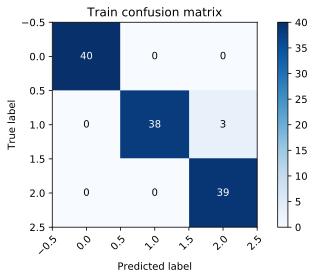

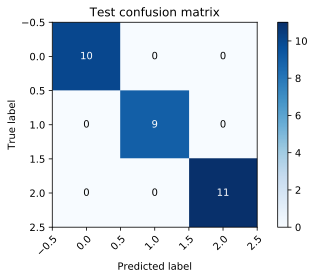

In [50]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(
#         xticks=np.arange(cm.shape[1]),
#            yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
#            xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

classes = np.unique(y_train.values)

plot_confusion_matrix(y_train, predictions_train, classes, title='Train confusion matrix')
plot_confusion_matrix(y_test, predictions_test, classes, title='Test confusion matrix')

plt.show()

## More Logistic Regression

In [55]:
titanic = pd.read_csv('./titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### We evaluate null values and the columns

In [57]:
titanic_drop = titanic.drop(columns=['Name', 'Ticket', 'PassengerId'])
titanic_drop.isnull().sum(axis = 0)

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [43]:
titanic_drop = titanic.drop(columns=['Name', 'Ticket', 'PassengerId', 'Cabin'])

In [44]:
titanic_missing = titanic_drop.dropna()
titanic_missing.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [45]:
titanic_missing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 8 columns):
Survived    712 non-null int64
Pclass      712 non-null int64
Sex         712 non-null object
Age         712 non-null float64
SibSp       712 non-null int64
Parch       712 non-null int64
Fare        712 non-null float64
Embarked    712 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 50.1+ KB


#### We have categorial values, we use `pd.get_dummies` to transform them into numerical values

In [46]:
titanic_with_dummies = pd.get_dummies(titanic_missing, columns=['Pclass', 'Sex', 'Embarked'], drop_first=True)
titanic_with_dummies.head()

,Survived,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,0,22.0,1,0,7.2500,0,1,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,1,0,0,1
3,1,35.0,1,0,53.1000,0,0,0,0,1
4,0,35.0,0,0,8.0500,0,1,1,0,1


#### We select our features and the target

In [47]:
from sklearn.linear_model import LogisticRegression

x_columns = [col for col in titanic_with_dummies.columns.values if col != "Survived"]
titanic_x = titanic_with_dummies[x_columns]
titanic_y = titanic_with_dummies["Survived"]
titanic_model = LogisticRegression(solver='lbfgs', max_iter=400)
titanic_model.fit(titanic_x, titanic_y)
titanic_model.score(titanic_x, titanic_y)

0.8047752808988764

Our model predicts almost 80% of the variation in the data.

**ROC Curve**

The ROC (or Receiving Operator Characteristic) curve is a graph that gives us more information about how well our classification algorithm classifies our data. The goal is to increase the area under the curve as much as possible. If the area under the curve is below the y = x line, this means that our algorithm is worse than a coin flip. Therefore, we must aspire to be at least above that line. However, what we really aspire to is an area of 0.9 or higher.

This plot utilizes matplotlib. Additionally, we will compute the true positive rate and false positive rate (tpr, fpr) to generate this plot.

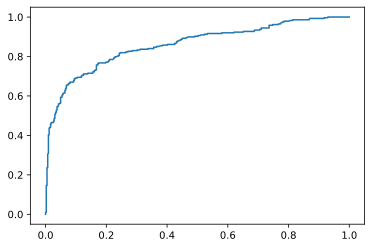

In [49]:
from sklearn import metrics
import matplotlib.pyplot as plt

y_pred_proba = titanic_model.predict_proba(titanic_x)[::,1]
fpr, tpr, _ = metrics.roc_curve(titanic_y,  y_pred_proba)
auc = metrics.roc_auc_score(titanic_y, y_pred_proba)
plt.plot(fpr,tpr);